# Smart Power Grid Energy Trading Data Analysis

This notebook is used to analyse the results obtained in our multi-agent simulation. These results will be used for our report. First we import necessary packages and load the data. The number of runs used for the data is manually entered.

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
# set parameters
N_RUNS = 10
N_STEPS = 1000

# load data
data_centralised = pd.read_csv('../data/results_centralised.csv')
data_distributed = pd.read_csv('../data/results_distributed.csv')

## Average over time

We define a function that gives an average of a given column over time. We then apply this function to several values and plot them.

In [12]:
def avg_over_runs (data, col_name):
    """
    Calculates an average over a number of runs of the given column in the given dataframe
    :param data: dataframe containing data to average
    :param col_name: the column which contains the data to average
    """
    res = [0 for _ in range(N_STEPS)]

    for i in range(N_RUNS):
        curr_rewards = data.loc[data['run'] == i][col_name].values

        for j in range(N_STEPS):
            res[j] += curr_rewards[j]

    res = [x/N_RUNS for x in res]

    return pd.DataFrame(res)

## Average funds over time

We first calculate average funds over time for both simulations.

In [13]:
avg_funds_dis = avg_over_runs(data_distributed, 'average funds')
avg_funds_cen = avg_over_runs(data_centralised, 'average funds')

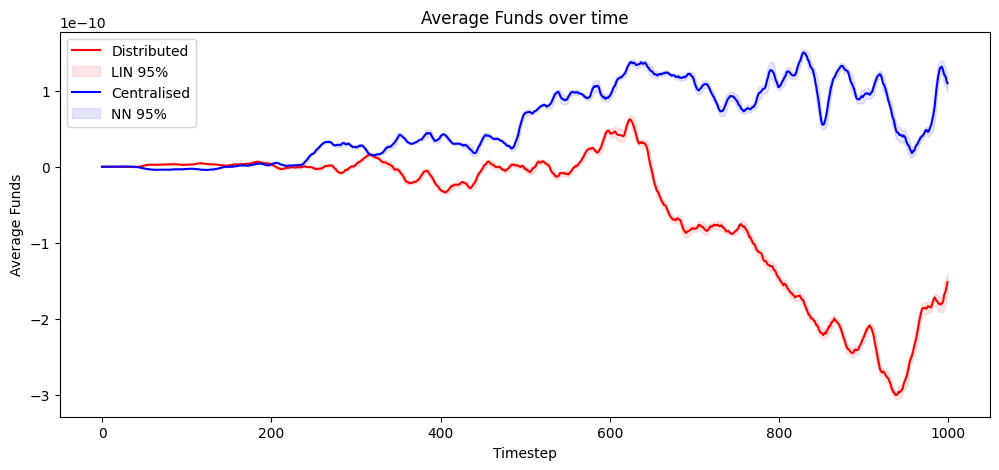

In [11]:
# plot the average funds over time for the different simulations, include standard deviation
# ref: https://stackoverflow.com/questions/70351809/python-calculate-confidence-interval-for-rolling-average-of-dataframe-entries

WS = 10
Z = 1.96

x_range = [i for i in range(N_STEPS)]

avg_funds_dis = pd.DataFrame(avg_funds_dis)
avg_funds_cen = pd.DataFrame(avg_funds_cen)



movMean_dis = avg_funds_dis.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()
movStd_dis = avg_funds_dis.rolling(window=WS, center=True, min_periods=1).std().values.ravel()
confInt_dis = Z * movStd_dis / np.sqrt(WS)

movMean_cen = avg_funds_cen.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()
movStd_cen = avg_funds_cen.rolling(window=WS, center=True, min_periods=1).std().values.ravel()
confInt_cen = Z * movStd_cen / np.sqrt(WS)


plt.figure(figsize=(12,5))
plt.plot(movMean_dis, label='Distributed', color='r')
plt.fill_between(x_range, movMean_dis - confInt_dis, movMean_dis + confInt_dis,
                 color='r', alpha=.1, label='LIN 95%')
plt.plot(movMean_cen, label='Centralised', color='b')
plt.fill_between(x_range, movMean_cen - confInt_cen, movMean_cen + confInt_cen,
                 color='b', alpha=.1, label='NN 95%')

plt.title('Average Funds over time')
plt.ylabel('Average Funds')
plt.xlabel('Timestep')
plt.legend()
plt.show()

## Energy vs Time in Distributed Simulation

Here we graph the relationship between energy production and price in the distributed simulation. 

In [15]:
avg_energy_produced = avg_over_runs(data_distributed, 'total energy produced')
avg_price = avg_over_runs(data_distributed, 'average price')

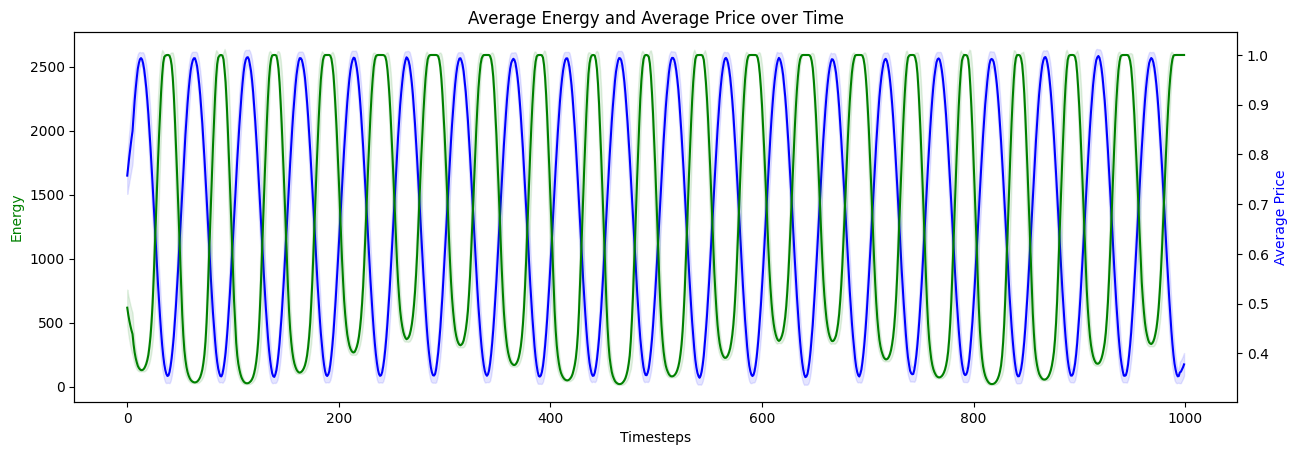

In [21]:
# plot the average funds over time for the different simulations, include standard deviation
# ref: https://stackoverflow.com/questions/70351809/python-calculate-confidence-interval-for-rolling-average-of-dataframe-entries

WS = 10
Z = 1.96

x_range = [i for i in range(N_STEPS)]

avg_energy_produced = pd.DataFrame(avg_energy_produced)
avg_price = pd.DataFrame(avg_price)



movMean_energy = avg_energy_produced.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()
movStd_energy = avg_energy_produced.rolling(window=WS, center=True, min_periods=1).std().values.ravel()
confInt_energy = Z * movStd_energy / np.sqrt(WS)

movMean_price = avg_price.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()
movStd_price = avg_price.rolling(window=WS, center=True, min_periods=1).std().values.ravel()
confInt_price = Z * movStd_price / np.sqrt(WS)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
fig.set_figwidth(15)
# plt.figure(figsize=(12,5))

ax1.plot(movMean_energy, label='Energy', color='b')
ax1.fill_between(x_range, movMean_energy - confInt_energy, movMean_energy + confInt_energy,
                 color='b', alpha=.1, label='LIN 95%')
ax2.plot(movMean_price, label='Average price', color='g')
ax2.fill_between(x_range, movMean_price - confInt_price, movMean_price + confInt_price,
                 color='g', alpha=.1, label='NN 95%')

ax1.set_xlabel('Timesteps')
ax1.set_ylabel('Energy', color='g')
#ax1.set_ylim(0, 2)
ax2.set_ylabel('Average Price', color='b')

plt.title('Average Energy and Average Price over Time')
plt.show()

## Proportion of Green Energy
Here we plot the proportion of green energy that is used in the grid. This is done by stating energy bought from the central distributor is grey energy as we cannot be certain how it was produced.

In [31]:
avg_demand = avg_over_runs(data_distributed, 'total energy demand')
avg_grey = avg_over_runs(data_distributed, 'total central energy bought')

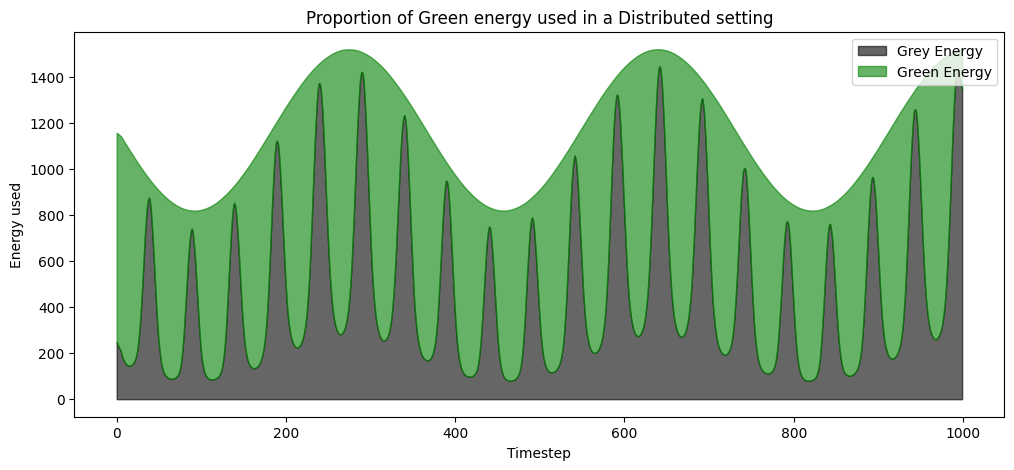

In [32]:
WS = 10

x_range = [i for i in range(N_STEPS)]

avg_demand= pd.DataFrame(avg_demand)
avg_grey = pd.DataFrame(avg_grey)

movMean_demand = avg_demand.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()

movMean_grey = avg_grey.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()


plt.figure(figsize=(12,5))
# plt.plot(movMean_grey, label='Grey Energy', color='k')
plt.fill_between(x_range, 0, movMean_grey,
                 color='k', alpha=.6, label='Grey Energy')
# plt.plot(movMean_demand, label='Green Energy', color='g')
plt.fill_between(x_range, movMean_grey, movMean_demand,
                 color='g', alpha=.6, label='Green Energy')

plt.title('Proportion of Green energy used in a Distributed setting')
plt.ylabel('Energy used')
plt.xlabel('Timestep')
plt.legend()
plt.show()

In [33]:
avg_demand = avg_over_runs(data_centralised, 'total energy demand')
avg_grey = avg_over_runs(data_centralised, 'total central energy bought')

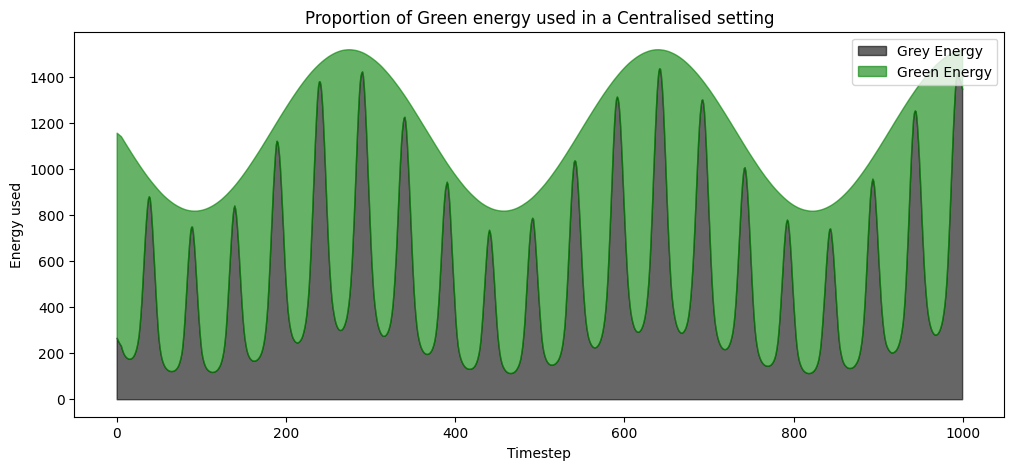

In [34]:
WS = 10

x_range = [i for i in range(N_STEPS)]

avg_demand= pd.DataFrame(avg_demand)
avg_grey = pd.DataFrame(avg_grey)

movMean_demand = avg_demand.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()

movMean_grey = avg_grey.rolling(window=WS, center=True, min_periods=1).mean().values.ravel()


plt.figure(figsize=(12,5))
# plt.plot(movMean_grey, label='Grey Energy', color='k')
plt.fill_between(x_range, 0, movMean_grey,
                 color='k', alpha=.6, label='Grey Energy')
# plt.plot(movMean_demand, label='Green Energy', color='g')
plt.fill_between(x_range, movMean_grey, movMean_demand,
                 color='g', alpha=.6, label='Green Energy')

plt.title('Proportion of Green energy used in a Centralised setting')
plt.ylabel('Energy used')
plt.xlabel('Timestep')
plt.legend()
plt.show()